# Roteiro para análise de dados do Detector de Raios Cósmicos

O intuito desse Notebook é entender e analisar os dados salvos provenientes do detector instalado na sua escola. Aqui passaremos a entender um pouco como o *Python* funciona e como analisar dados nesse ambiente!
Para cumprir esse objetivos seguiremos a seguinte ordem:
- Importaremos os dados de um arquivo .csv
- Exploraremos o que tem nesse arquivo por meio de funções proporcionadas pelas bibliotecas
- Iremos gerar gráficos para visualizar os eventos

## Importando Bibliotecas 

Para que as funções que usaremos nesse programa funcionem é necessário carregar o que chamamos de **Bibliotecas**.
Essas são outros programas que contem funções criadas por outras pessoas que nos permitem utilizar ferramentas já prontas para nos ajudar a criar o nosso programa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cosmic
%matplotlib inline  

Vamos enteder o que cada uma delas faz e porque elas são importantes para o nosso trabalho:
<img src="https://miro.medium.com/max/765/0*p0FtnloWd4ogMvTQ.png" width=250 height=250 />

O NumPy é uma poderosa biblioteca Python que é usada principalmente para realizar cálculos em vetores multidimensionais (listas, matrizes e tensores de maiores dimensões). O **NumPy** fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos. Além disso, essa biblioteca possui uma estrutura de dados própria: o numpy array, esses são equipados com um grande número de funções e operadores que ajudam a escrever rapidamente códigos de alto desempenho para vários tipos de cálculos.

Fonte: https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355

Utilizaremos essa biblioteca porque temos uma grande quantidade de dados que são salvos em uma grande tabela. As colunas dessas tabelas podem ser interpretadas pelo Numpy, o que nos ajuda pois a biblioteca conta com muitas funções úteis para fazermos aritmética com elas


<img src="https://skeptric.com/images/pandas.png" width=200 height=200 />

Pandas é uma biblioteca que nos permite ler arquivos, como .txt, .csv, e .xslx, e extrair deles um **dataframe**. Um dataframe nada mais é do que uma tabela em que a biblioteca consegue manipular. Assim, podemos enxergar, manipular e analisar os dados que colhemos dos sensores, tudo aqui no Python.
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width=200 height=200 />

Matplotlib é uma biblioteca que possibilita a criação de gráficos robustos e altamente costumizáveis. Além disso, é muito intuitivo conseguir construir um gráfico basico, o que a torna extramente didática para iniciantes. 

## Abrindo a Base de Dados

In [12]:
df = pd.read_csv("events.csv", index_col = "EventNumber")

Antes de partir para qualquer tipo de analise é uma boa prática
tentar entender como os dados estão estruturados e dar uma olhada
no dataset em geral.

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 109491 to 209490
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   TriggerBits  100000 non-null  int64 
 1   Timestamp    100000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None


### Trigger Bits

Configuraçao do sensor que recebeu o raio cósmico:
<img src="fig/cosmic.png" width=500/>

Os bits guardados na base de dados não referem-se somente ao sensores ativos, mas também a outras propriedades, como a configuração atual dos sensores (como visto na imagem, pode-se arranjar os sensores de maneiras diferentes) paridades entre as ativações ou calibrações do equipamento.


### Timestamp

Essa coluna nos diz o horário exato, com precisão de segundos, em que o evento ocorreu. Isso é bastante importante para as análises temporais.


Vemos que os dados são majoritariamente numéricos e somente a coluna Timestamp é do tipo *obejct*,
isso ocorre porque eles são lidos como strings no documento .csv . Olhando elas entenderemos melhor o que
representam.


Agora veremos como são as linhas da base de dados:

In [14]:
df.head()

,TriggerBits,Timestamp
EventNumber,,
109491,1000111,1989-09-29 13:55:03
109492,1000111,1989-09-29 13:55:03
109493,11101000,1989-09-29 13:55:04
109494,1000111,1989-09-29 13:55:04
109495,1000111,1989-09-29 13:55:05


Essas seriam as cinco primeiras linhas da nossa base de dados, nelas enxergamos coisas interessantes:
* Cada linha é um evento diferente
* Temos informações do horário em que o evento aconteceu
* Sabemos quais foram os sensores acionados em cada detecção

Para que possamos utilizar o Timestamp, devemos convertelo novamente para datetime, o tipo em que o 
Python consegue interpeta-lo

In [5]:
df['Timestamp'] =  pd.to_datetime(df["Timestamp"])

Agora podemos começar a analisar o que temos

## Análise e histogramas dos eventos

### Média de eventos por hora

Temos eventos de dois dias distintos, 29 e 30 de setembro de 2019. 
Vamos inicialmente ver quantos eventos acontecem por hora:

In [7]:
cosmic.MediaPorHora(df,dia=29)

Média diária:4977.636363636364
    hora
13   496
14  5430
15  5444
16  5086
17  5450
18  5412
19  5633
20  5416
21  5415
22  5463
23  5509


In [8]:
cosmic.MediaPorHora(df,dia=30)

Média diária:5027.333333333333
   hora
0  5445
1  5455
2  5394
3  5470
4  5309
5  5486
6  5508
7  5489
8  1690


Distribuição das diferentes ativações dos sensores 

## Histogramas
Queremos saber qual a distribuição de raios cósmicos em um dia, então usaremos um Histograma:

O histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes Importante ferramenta da estatística, o histograma também é uma das chamadas sete ferramentas da qualidade.

Quando o volume de dados aumenta indefinidamente dentro do conjunto de dados e o intervalo de classes tende a zero (o que torna os retângulos cada vez mais finos e altos), a distribuição de frequência torna–se uma distribuição de densidade de probabilidades. A construção de histogramas tem caráter preliminar em qualquer estudo e é um importante indicador da distribuição de dados. Os histogramas podem indicar se uma distribuição se aproxima de uma função normal, assim como também podem indicar a mistura de populações quando se apresentam bimodais.


<img src="https://d1lc5plzz0mq74.cloudfront.net/wp-content/uploads/2015/08/21202945/ED_1.png" width=400 height=400 />

Fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Histograma)

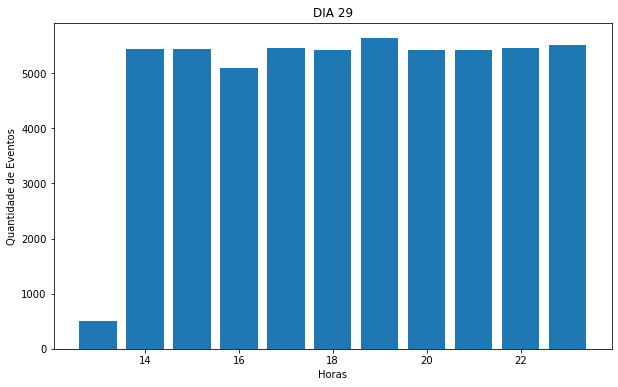

In [9]:
cosmic.HistogramaPorHora(df,dia=29)

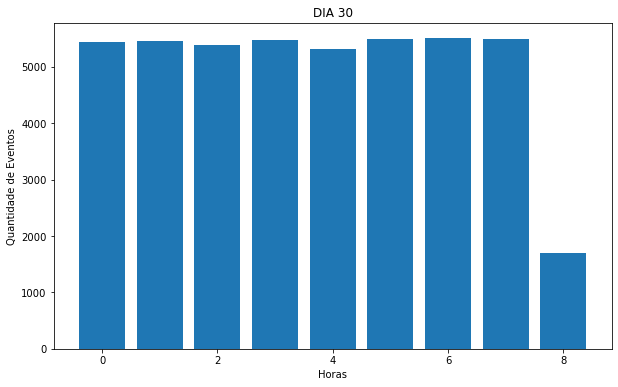

In [10]:
cosmic.HistogramaPorHora(df,dia=30)

## Outros gráficos

Se precisarmos de precisão maior de tempo, podemos também gerar gráficos com resoluções menores, o gráfico abaixo é um exemplo, nele vemos a quantidade de eventos no dia 30 agrupuados de 5 em 5 minutos:

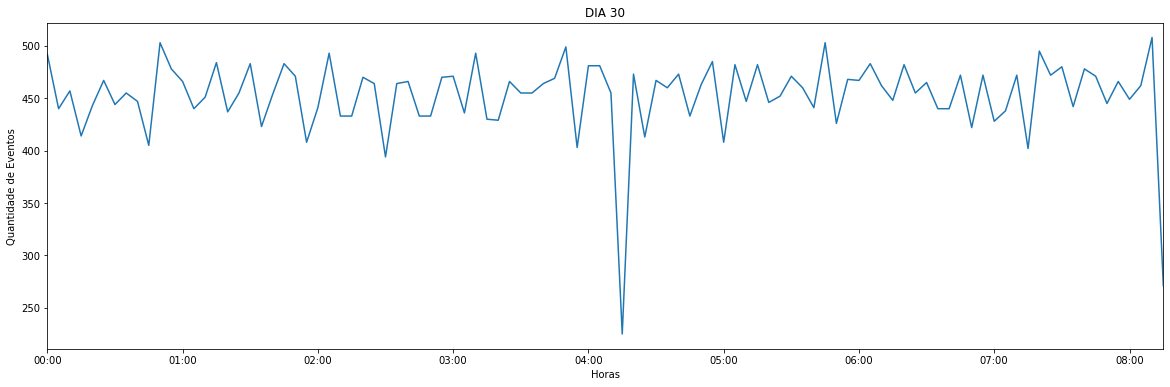

In [6]:
cosmic.Histograma(df, dia =30, bin = 5)